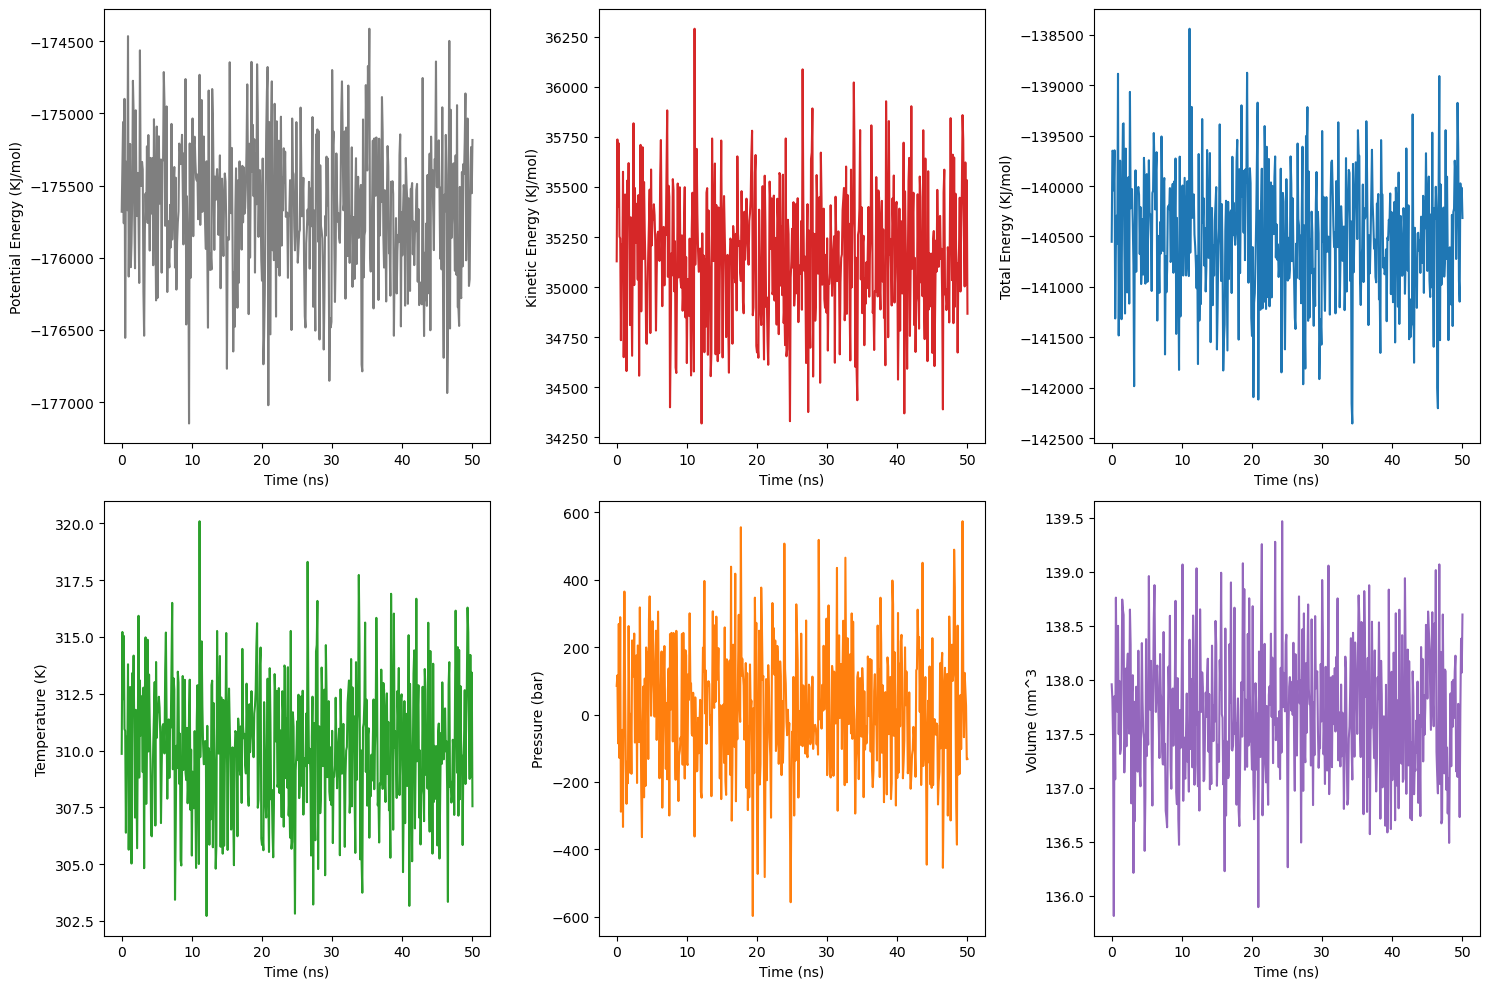

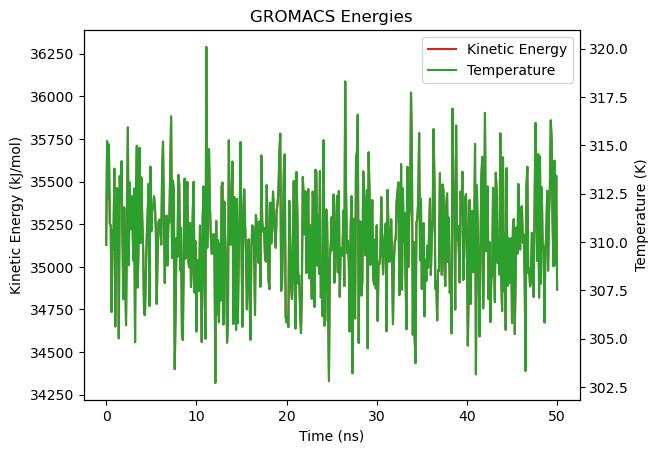

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Path to your file
file_path = 'comp-lab-class-2024/Week2-DataAnalysis/Data/1hz3_T310.run.25000000.energy.xvg'

# Reading and processing the file, skipping comment lines
with open(file_path, 'r') as file:
    data_lines = [line for line in file if not line.startswith(('#', '@'))]

# Defining columns
columns = ['Time', 'Potential_Energy', 'Kinetic_Energy', 'Total_Energy', 'Temperature', 'Pressure', 'Volume']
data = pd.DataFrame([line.split() for line in data_lines], columns=columns)

# Converting to numeric values
data = data.apply(pd.to_numeric)

# Converting time from ps to ns
data['Time_in_ns']= [t / 1000 for t in data['Time']]

# Create 6 separate plots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].plot(data['Time_in_ns'], data['Potential_Energy'], 'tab:grey')
axs[0, 0].set(ylabel='Potential Energy (KJ/mol)')
axs[0, 1].plot(data['Time_in_ns'], data['Kinetic_Energy'], 'tab:red')
axs[0, 1].set(ylabel='Kinetic Energy (KJ/mol)')
axs[0, 2].plot(data['Time_in_ns'], data['Total_Energy'], 'tab:blue')
axs[0, 2].set(ylabel='Total Energy (KJ/mol)')
axs[1, 0].plot(data['Time_in_ns'], data['Temperature'], 'tab:green')
axs[1, 0].set(ylabel='Temperature (K)')
axs[1, 1].plot(data['Time_in_ns'], data['Pressure'], 'tab:orange')
axs[1, 1].set(ylabel='Pressure (bar)')
axs[1, 2].plot(data['Time_in_ns'], data['Volume'], 'tab:purple')
axs[1, 2].set(ylabel='Volume (nm^3')

for ax in axs.flat:
    ax.set(xlabel='Time (ns)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
plt.tight_layout()

# Create a figure and axis object
fig, ax1 = plt.subplots()

# Plot Kinetic Energy on the first y-axis
color = 'tab:red'
ax1.set_xlabel('Time (ns)')
ax1.set_ylabel('Kinetic Energy (kJ/mol)')
ax1.plot(data['Time_in_ns'], data['Kinetic_Energy'], color=color, label='Kinetic Energy')
ax1.tick_params(axis='y') 

# Create a second y-axis for Temperature
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Temperature (K)')
ax2.plot(data['Time_in_ns'], data['Temperature'], color=color, label='Temperature')
ax2.tick_params(axis='y',)

# Add a title
plt.title('GROMACS Energies')

# Combine legends from both axes
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Display the plot
plt.show()